In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [44]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [45]:
df['flag_doente'].value_counts()

1    509
0    411
Name: flag_doente, dtype: int64

# 1. Montando uma bivariada com variável *sex*

In [69]:
tab=pd.crosstab(df['sex'],df['flag_doente'],margins=True)
tab.rename(columns={0:'Num_saudaveis',1:'Num_doentes','All':'Total'},inplace=True)



In [70]:
tab['Num_doentes']

sex
Female     50
Male      459
All       509
Name: Num_doentes, dtype: int64

In [72]:
tab['qtd_media_doentes']=tab['Num_doentes'].mean()
tab

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes
sex,,,,
Female,144,50,194,339.333333
Male,267,459,726,339.333333
All,411,509,920,339.333333


In [74]:
tab['chance']=tab['Num_doentes']/tab['Num_saudaveis']
tab

#ODDS


flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance
sex,,,,,
Female,144,50,194,339.333333,0.347222
Male,267,459,726,339.333333,1.719101
All,411,509,920,339.333333,1.238443


- Chance (Odds) é definido como o número de possibilidades para o evento dividido pelo número de possibilidades para seu complementar. Neste exemplo acima a chance de um paciente ficar doente é de 50/144 (144 é o número complementar para o total de amostra de 194). Sendo assim, a chance de um homem ficar doente é 1.71 maior que uma mulher. 

In [78]:
tab['RC_vs_total']=tab['chance']/tab.loc['All','chance']
tab
#ODDs ratio

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_total,RC_vs_total
sex,,,,,,,
Female,144,50,194,339.333333,0.347222,0.280370,0.280370
Male,267,459,726,339.333333,1.719101,1.388115,1.388115
All,411,509,920,339.333333,1.238443,1.000000,1.000000


- Razão de chances (odds ratio) sempre compara as chances de um evento para dois públicos. Neste exemplo acima comparei as chances dos pacientes doentes com relação ao total dos pacientes saudaveis e doentes. Sendo assim, as chances de um homem ficar doente é 1.38 maior do que pegar uma pessoa aleatória.

In [81]:
tab['Logito']=np.log(tab['chance'])
tab
#Log de ODDS(chance)

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_total,RC_vs_total,logito,Logito
sex,,,,,,,,,
Female,144,50,194,339.333333,0.347222,0.280370,0.280370,-1.057790,-1.057790
Male,267,459,726,339.333333,1.719101,1.388115,1.388115,0.541802,0.541802
All,411,509,920,339.333333,1.238443,1.000000,1.000000,0.213855,0.213855


In [82]:
tab['WOE']=np.log(tab['RC_vs_total'])
tab


flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_total,RC_vs_total,logito,Logito,WOE
sex,,,,,,,,,,
Female,144,50,194,339.333333,0.347222,0.280370,0.280370,-1.057790,-1.057790,-1.271645
Male,267,459,726,339.333333,1.719101,1.388115,1.388115,0.541802,0.541802,0.327947
All,411,509,920,339.333333,1.238443,1.000000,1.000000,0.213855,0.213855,0.000000


# 2. Montando um biraviada com a variavél *age* 

In [108]:

# Definir os intervalos de idade
bins = [28, 38, 48, 58, 77]
labels = ['28-38', '38-48', '48-58', '58-77']

# Criar a variável bivariada "Faixa Etária"
df['idade'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,flag_doente,idade
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,58-77
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,58-77
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,58-77
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,28-38
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,38-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1,48-58
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,0,58-77
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1,48-58
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0,0,58-77


In [110]:
tab_idade=pd.crosstab(df['idade'],df['flag_doente'],margins=True)
tab_idade.rename(columns={0:'Num_saudaveis',1:'Num_doentes','All':'Total'},inplace=True)
tab_idade

flag_doente,Num_saudaveis,Num_doentes,Total
idade,,,
28-38,36,13,49
38-48,118,72,190
48-58,163,187,350
58-77,94,235,329
All,411,507,918


In [114]:
tab_idade['qtd_media_doentes']=tab_idade['Num_doentes'].mean()
tab_idade
#Quantidade média de doentes

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes
idade,,,,
28-38,36,13,49,202.8
38-48,118,72,190,202.8
48-58,163,187,350,202.8
58-77,94,235,329,202.8
All,411,507,918,202.8


In [115]:
tab_idade['chance']=tab_idade['Num_doentes']/tab_idade['Num_saudaveis']
tab_idade

#ODDS


flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance
idade,,,,,
28-38,36,13,49,202.8,0.361111
38-48,118,72,190,202.8,0.610169
48-58,163,187,350,202.8,1.147239
58-77,94,235,329,202.8,2.500000
All,411,507,918,202.8,1.233577


In [116]:
tab_idade['RC_vs_total']=tab_idade['chance']/tab_idade.loc['All','chance']
tab_idade
#ODDs ratio

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_vs_total
idade,,,,,,
28-38,36,13,49,202.8,0.361111,0.292735
38-48,118,72,190,202.8,0.610169,0.494634
48-58,163,187,350,202.8,1.147239,0.930011
58-77,94,235,329,202.8,2.500000,2.026627
All,411,507,918,202.8,1.233577,1.000000


In [117]:
tab_idade['Logito']=np.log(tab_idade['chance'])
tab_idade
#Log de ODDS(chance)

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_vs_total,Logito
idade,,,,,,,
28-38,36,13,49,202.8,0.361111,0.292735,-1.018570
38-48,118,72,190,202.8,0.610169,0.494634,-0.494019
48-58,163,187,350,202.8,1.147239,0.930011,0.137358
58-77,94,235,329,202.8,2.500000,2.026627,0.916291
All,411,507,918,202.8,1.233577,1.000000,0.209918


In [118]:
tab_idade['WOE']=np.log(tab_idade['RC_vs_total'])
tab_idade


flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_vs_total,Logito,WOE
idade,,,,,,,,
28-38,36,13,49,202.8,0.361111,0.292735,-1.018570,-1.228487
38-48,118,72,190,202.8,0.610169,0.494634,-0.494019,-0.703936
48-58,163,187,350,202.8,1.147239,0.930011,0.137358,-0.072559
58-77,94,235,329,202.8,2.500000,2.026627,0.916291,0.706373
All,411,507,918,202.8,1.233577,1.000000,0.209918,0.000000


In [120]:
tab_idade['idade_media']=df['age'].mean()
tab_idade

flag_doente,Num_saudaveis,Num_doentes,Total,qtd_media_doentes,chance,RC_vs_total,Logito,WOE,idade_media
idade,,,,,,,,,
28-38,36,13,49,202.8,0.361111,0.292735,-1.018570,-1.228487,53.51087
38-48,118,72,190,202.8,0.610169,0.494634,-0.494019,-0.703936,53.51087
48-58,163,187,350,202.8,1.147239,0.930011,0.137358,-0.072559,53.51087
58-77,94,235,329,202.8,2.500000,2.026627,0.916291,0.706373,53.51087
All,411,507,918,202.8,1.233577,1.000000,0.209918,0.000000,53.51087


# 3. Visualização grafica

In [159]:
tab_idade.drop([4],inplace=True)
#Eliminando a ultima linha (All) para que não prejudicar a visualização ao plotar

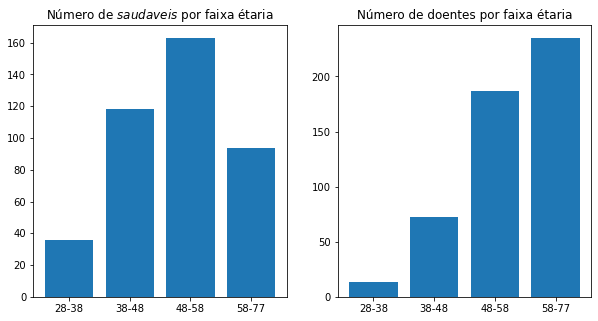

In [199]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(tab_idade['idade'], tab_idade['Num_saudaveis'])
ax1.set_title('Número de $saudaveis$ por faixa étaria')

ax2.bar(tab_idade['idade'], tab_idade['Num_doentes'])
ax2.set_title('Número de doentes por faixa étaria')

plt.show()

1. No grafico acima é possível verificar que majoritariamente os pacientes com maior risco a doença estão na faixa étaria 58-77. 
2. Quanto menor a faixa étaria menor o risco a doença.